`
Date:       22-01-2021
Params:      R0.7-0.96B13ATP2000MD3000S273T5.0
About:       Check the number of binding myosin
Version:     v11n
Data source: /media/nitta/HDCZ-UT/NITTA-LAB HD3/Sam/V11n/dt1.0s5/SEED273MD2000
By:          Sam Macharia
`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
cm = 1/2.54
import seaborn as sns

In [3]:
r = np.array([0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.00])

acM = []; defM = []
# seed 77, MD 3000
for i in [0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.00]:
    ac_ = pd.read_csv('dataDt1s5/acBm_s5dt1r'+str('%.2f'%round(i,2))+'.csv',names=['bm'])
    def_ = pd.read_csv('dataDt1s5/defBm_s5dt1r'+str('%.2f'%round(i,2))+'.csv',names=['bm'])
    acM.append(ac_)
    defM.append(def_)

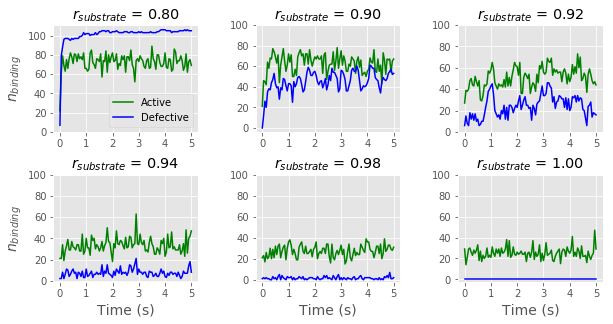

In [10]:
f = plt.figure(figsize=(25*cm,12*cm))
#plt.style.use('ggplot') # like R figures *

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

x = np.linspace(0,5,101)
c = 0
j = [1,6,7,8,10,11]
for i in range(0,6):
    f.add_subplot(2,3,i+1)
    plt.plot(x,acM[j[c]]['bm'].T[0::5], color='green', label='Active')
    plt.plot(x,defM[j[c]]['bm'].T[0::5], color='blue', label='Defective')
    plt.xticks(np.arange(0,6,1))
    plt.yticks(np.arange(0,110,20))
    plt.title('$r_{substrate}$ = %.2f'%r[j[c]]); c+=1
    if i>2:
        plt.xlabel('Time (s)', fontsize=14)
    if i==0 or i == 3:
        plt.ylabel('$n_{binding}$', fontsize=14)
    if i==0:
        plt.legend()
        
##plt.savefig('fig/v11nBindingMotors.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('fig/v11nBindingMotors_v2.svg', format='svg', dpi=500, bbox_inches='tight')
##plt.savefig('fig/v11nBindingMotors.png', format='png', dpi=700, bbox_inches='tight')
#plt.savefig('fig/v11nBindingMotors.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [12]:
import subprocess
subprocess.call('inkscape fig/v11nBindingMotors_v2.svg -M fig/v11nBindingMotors_v2.emf', shell=True)

0

/home/nitta/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


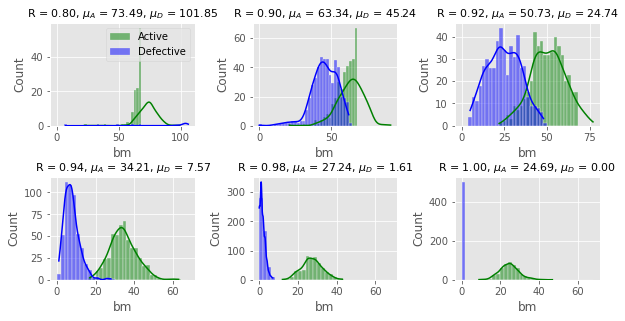

In [4]:
f = plt.figure(figsize=(25*cm,12*cm))
#plt.style.use('ggplot') # like R figures *

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.5)

bins = np.arange(0,70,2)
x = np.linspace(0,5,101)
c = 0
j = [1,6,7,8,10,11]
for i in range(0,6):
    f.add_subplot(2,3,i+1)
    sns.histplot(acM[j[c]]['bm'].T, kde=True, color='green', bins=bins, label='Active')
    sns.histplot(defM[j[c]]['bm'].T, kde=True, color='blue', bins=bins, label='Defective')
    #plt.xticks(np.arange(0,6,1))
    #plt.yticks(np.arange(0,26,5))
    plt.title('R = %.2f, $\mu_A$ = %.2f, $\mu_D$ = %.2f'%(r[j[c]],np.mean(acM[j[c]]['bm'].T),np.mean(defM[j[c]]['bm'].T)), fontsize=11); c+=1
#     if i>2:
#         plt.xlabel('Binding myosin', fontsize=15)
#     if i==0 or i == 3:
#         plt.ylabel('Count', fontsize=15)
    if i==0:
        plt.legend()
#plt.tight_layout()
#plt.savefig('fig/v11nBindingMotorsHist.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('fig/v11nBindingMotorsHist.png', format='png', dpi=700, bbox_inches='tight')
#plt.savefig('fig/v11nBindingMotorsHist.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()